# Linear Regression on Boston Housing Dataset

*   Implement multiple linear regression from scratch.
*  Prepare a complete regression project on Boston house prices dataset. The dataset can be acquired from kaggle.






In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv("Boston Housing.csv",delim_whitespace=True)
data.columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 
        'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


*   CRIM: Per capita crime rate by town
*   ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
*   INDUS: Proportion of non-retail business acres per town
*   CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
*   NOX: Nitric oxide concentration (parts per 10 million)
*   RM: Average number of rooms per dwelling
*   AGE: Proportion of owner-occupied units built prior to 1940
*   DIS: Weighted distances to five Boston employment centers
*   RAD: Index of accessibility to radial highways
*   TAX: Full-value property tax rate per $10,000

*   PTRATIO: Pupil-teacher ratio by town
*   B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
*   LSTAT: Percentage of lower status of the population
*   MEDV: Median value of owner-occupied homes in $1000s

In [3]:
data[:5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


In [4]:
data.shape

(505, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    float64
 1   ZN       505 non-null    float64
 2   INDUS    505 non-null    float64
 3   CHAS     505 non-null    int64  
 4   NOX      505 non-null    float64
 5   RM       505 non-null    float64
 6   AGE      505 non-null    float64
 7   DIS      505 non-null    float64
 8   RAD      505 non-null    int64  
 9   TAX      505 non-null    float64
 10  PTRATIO  505 non-null    float64
 11  B        505 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MEDV     505 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


In [6]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620667,11.350495,11.154257,0.069307,0.554728,6.284059,68.581584,3.794459,9.566337,408.459406,18.461782,356.594376,12.668257,22.529901
std,8.608572,23.343704,6.855868,0.254227,0.115990,0.703195,28.176371,2.107757,8.707553,168.629992,2.162520,91.367787,7.139950,9.205991
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.885000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.625000,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

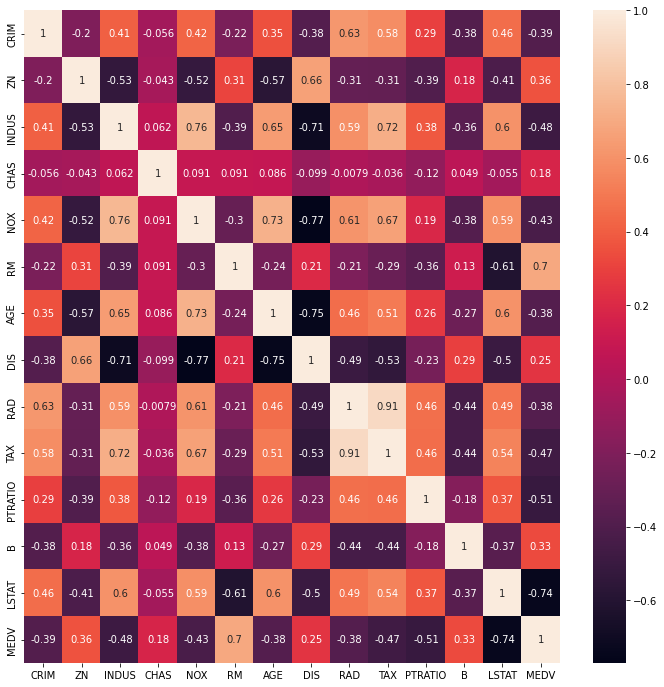

In [8]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


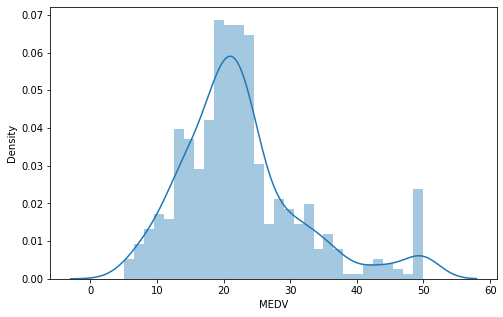

In [9]:
plt.figure(figsize=(8,5))
sns.distplot(data['MEDV'], bins=30)
plt.show()

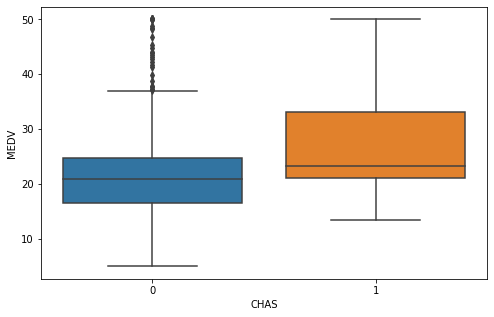

In [10]:
plt.figure(figsize=(8,5))
ax = sns.boxplot(x=data['CHAS'], y=data['MEDV'])

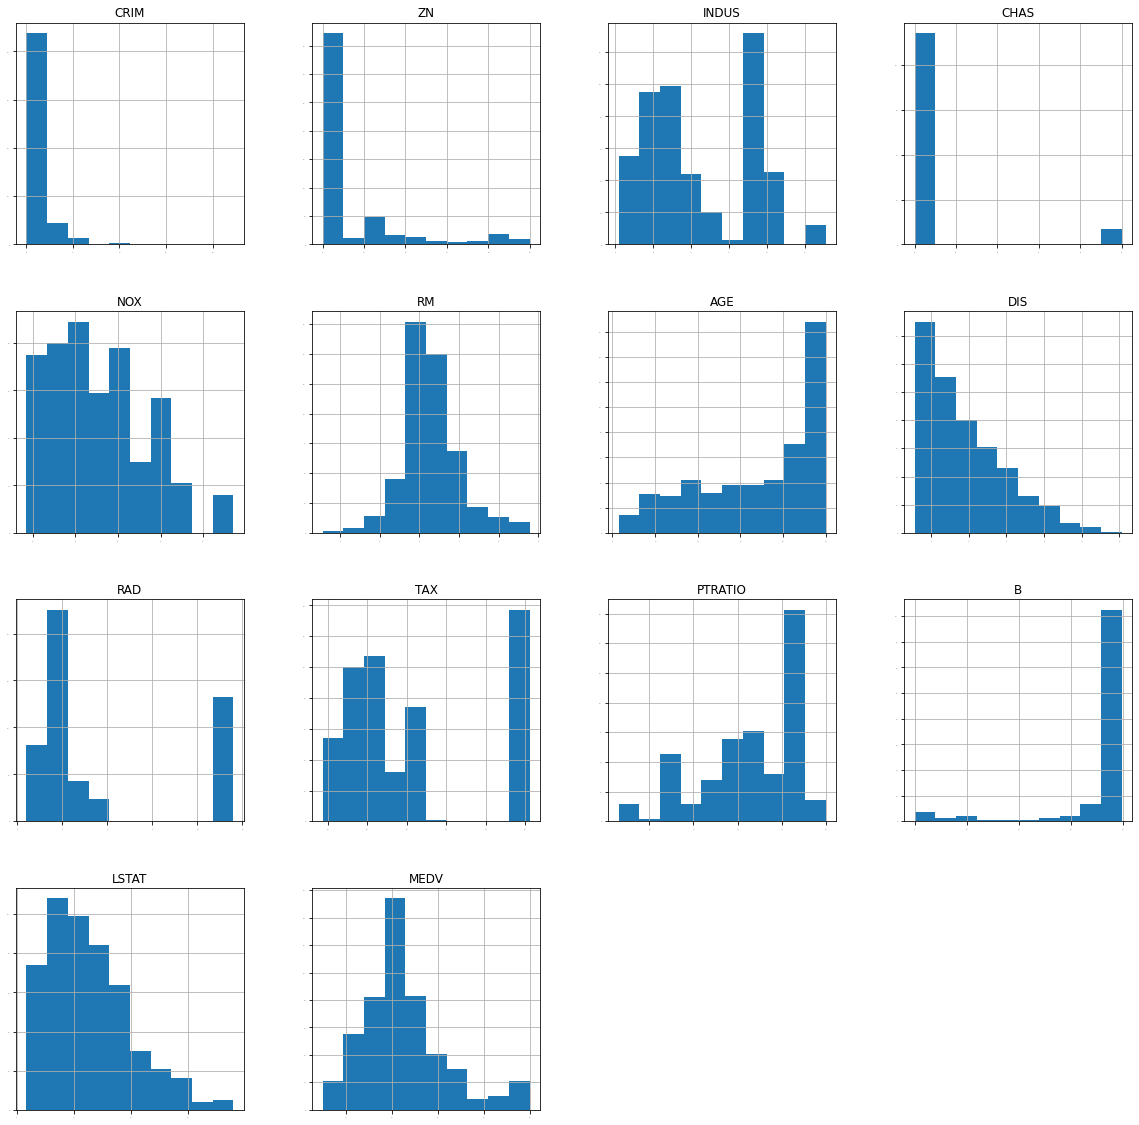

In [11]:
data.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize = (20,20))           
plt.show()

In [12]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [13]:
X=data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
Y=data[['MEDV']]

In [14]:
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LinearRegression

In [15]:
X_train, X_test, Y_train, Y_test = split(X, Y, test_size=0.2, random_state=0)

Applying Standard Scaler

In [16]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train =  ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [17]:
print(f'X_train: {np.shape(X_train)}\nY_train: {np.shape(Y_train)}\nX_test: {np.shape(X_test)}\nY_test: {np.shape(Y_test)}')

X_train: (404, 13)
Y_train: (404, 1)
X_test: (101, 13)
Y_test: (101, 1)


In [18]:
reg = LinearRegression()
reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_test)

In [19]:
from sklearn.metrics import mean_squared_error
scores = reg.score(X_test, Y_test)
print(scores)
mean_squared_error(Y_pred,Y_test)

0.788107980690122


17.541164569573642

Applying MinMax Scaler

In [20]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
X_train =  minmax.fit_transform(X_train)
X_test = minmax.transform(X_test)

In [21]:
reg = LinearRegression()
reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_test)

In [22]:
from sklearn.metrics import mean_squared_error
scores = reg.score(X_test, Y_test)
print(scores)
mean_squared_error(Y_pred,Y_test)

0.7881079806901222


17.541164569573624

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


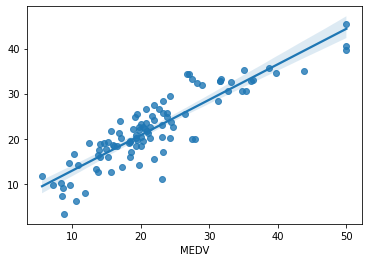

In [23]:
sns.regplot(Y_test,Y_pred)

Applying KFold

In [24]:
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import r2_score
kf = KFold(shuffle=True, random_state=42, n_splits=10)

In [25]:
lr = LinearRegression()
lr_score = cross_val_predict(lr, X,Y, cv=kf)
print("Linear Regression CV score: ", r2_score(Y, lr_score))

Linear Regression CV score:  0.7218759312843896


In [26]:
lr.fit(X_train, Y_train)
lr_pred = lr.predict(X_test)
lr_acc = lr.score(X_test, Y_test)
print("The training accuracy for Linear Regression is:", lr.score(X_train, Y_train)*100, "%")
print("The testing accuracy for Linear Regression is:", lr_acc * 100, "%")

The training accuracy for Linear Regression is: 72.75842025042232 %
The testing accuracy for Linear Regression is: 78.81079806901222 %
